In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import numpy as np


from sklearn.metrics import mean_squared_error, r2_score, log_loss
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')

In [5]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv"
churn_df = pd.read_csv(url)
churn_df.to_csv('churn.csv', index=False)
churn_df

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,tollmon,equipmon,cardmon,wiremon,longten,tollten,cardten,voice,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,20.75,0.00,15.25,35.7,42.00,211.45,125.0,1.0,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,0.00,0.00,0.00,0.0,288.80,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,0.00,0.00,0.00,0.0,157.05,0.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,45.00,50.10,23.25,64.9,239.55,1873.05,880.0,1.0,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,22.00,0.00,23.75,0.0,47.45,166.10,145.0,1.0,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,1.0,0.0,17.35,24.50,0.00,14.25,0.0,973.10,1343.50,720.0,0.0,0.0,0.0,0.0,1.0,0.0,2.854,3.199,4.419,3.0,0.0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,1.0,0.0,6.00,28.00,0.00,12.75,0.0,203.25,959.40,435.0,0.0,0.0,0.0,1.0,1.0,0.0,1.792,3.332,3.178,3.0,0.0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,1.0,0.0,3.85,23.75,0.00,12.50,0.0,29.90,128.45,80.0,0.0,0.0,0.0,1.0,1.0,0.0,1.348,3.168,3.850,3.0,0.0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1.0,1.0,8.70,47.75,0.00,32.75,64.0,186.60,1152.90,780.0,1.0,1.0,1.0,1.0,1.0,1.0,2.163,3.866,3.219,4.0,1.0


In [79]:
df = churn_df[['tenure', 'age', 'address','ed','callcard','wireless','churn']]
df['churn'] = churn_df['churn'].astype('int')
df.describe()

,tenure,age,address,ed,callcard,wireless,churn
count,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000
mean,35.505000,41.165000,11.650000,2.82500,0.705000,0.290000,0.290000
std,21.640971,13.076803,10.158419,1.28555,0.457187,0.454901,0.454901
min,1.000000,19.000000,0.000000,1.00000,0.000000,0.000000,0.000000
25%,16.750000,31.000000,3.000000,2.00000,0.000000,0.000000,0.000000
50%,33.500000,40.000000,9.000000,3.00000,1.000000,0.000000,0.000000
75%,55.250000,51.000000,18.000000,4.00000,1.000000,1.000000,1.000000
max,72.000000,76.000000,48.000000,5.00000,1.000000,1.000000,1.000000


In [80]:
X = np.asarray(df[['tenure','age','address','ed','callcard','wireless']])
y = np.asarray(df['churn'])


In [81]:
X_norm = StandardScaler().fit_transform(X)
X_norm[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  1.6961288 ,  0.64686916,
         1.56469673],
       [-0.11604313, -0.62595491,  0.03454064, -0.6433592 , -1.54590766,
        -0.63910148],
       [-0.57928917, -0.85594447, -0.261522  , -1.42318853, -1.54590766,
        -0.63910148],
       [ 0.11557989, -0.47262854, -0.65627219, -0.6433592 ,  0.64686916,
         1.56469673],
       [-1.32048283, -0.47262854,  0.23191574, -0.6433592 ,  0.64686916,
        -0.63910148]])

In [82]:
train_X, test_X, train_y, test_y = train_test_split(X_norm, y, test_size=0.2, random_state=4)

In [83]:
LR = LogisticRegression().fit(train_X, train_y)

In [84]:
y_hat = LR.predict(test_X)
y_hat_prob = LR.predict_proba(test_X)
y_hat_prob[:10]

array([[0.94421084, 0.05578916],
       [0.7055942 , 0.2944058 ],
       [0.60869835, 0.39130165],
       [0.94756136, 0.05243864],
       [0.66715179, 0.33284821],
       [0.87309811, 0.12690189],
       [0.55569234, 0.44430766],
       [0.63320981, 0.36679019],
       [0.42788688, 0.57211312],
       [0.75936034, 0.24063966]])

In [85]:
df

,tenure,age,address,ed,callcard,wireless,churn
0,11.0,33.0,7.0,5.0,1.0,1.0,1
1,33.0,33.0,12.0,2.0,0.0,0.0,1
2,23.0,30.0,9.0,1.0,0.0,0.0,0
3,38.0,35.0,5.0,2.0,1.0,1.0,0
4,7.0,35.0,14.0,2.0,1.0,0.0,0
...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,1.0,1.0,0.0,0
196,34.0,23.0,3.0,1.0,1.0,0.0,0
197,6.0,32.0,10.0,1.0,1.0,0.0,0
198,24.0,30.0,0.0,4.0,1.0,1.0,1


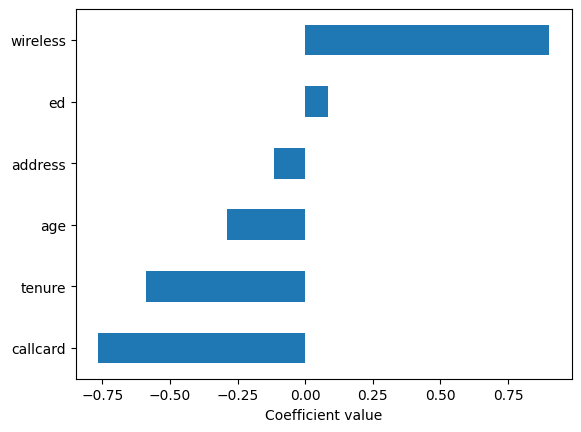

In [86]:
coefficients = pd.Series(LR.coef_[0],index = df.columns[:-1])
coefficients.sort_values().plot(kind='barh')
plt.xlabel('Coefficient value')
plt.show()

In [87]:
log_loss(test_y, y_hat_prob)

0.7087421464234449